In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [130]:
df = pd.read_csv('df_v2.csv')
df

,URL,Ubicación,Precio ARS,Precio USD,Expensas,Sup. cubierta [m²],Dormitorios,Baños,Ambientes,Cocheras,Sup. terreno [m²],Antiguedad [años],Estado
0,https://www.argenprop.com/casa-en-alquiler-en-...,Honorio Pueyrredón 5500,NaN,1400.000000,NaN,160.0,3.0,2.0,4.0,4.0,1.0,NaN,Bueno
1,https://www.argenprop.com/casa-en-alquiler-en-...,Barrio Los Pilares,NaN,1000.000000,NaN,NaN,2.0,2.0,3.0,2.0,800.0,14.0,Bueno
2,https://www.argenprop.com/departamento-en-alqu...,Av. Balbin 2400,NaN,1100.000000,NaN,76.0,2.0,2.0,3.0,1.0,NaN,11.0,Muy Bueno
3,https://www.argenprop.com/departamento-en-alqu...,Juramento al 1400,NaN,250.000000,17500.0,35.0,NaN,1.0,0.0,NaN,NaN,40.0,Bueno
4,https://www.argenprop.com/casa-en-alquiler-en-...,Village Golf & Tennis,NaN,4000.000000,NaN,330.0,4.0,2.0,6.0,1.0,900.0,0.0,Bueno
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7729,https://www.argenprop.com/casa-en-alquiler-en-...,Corrientes al 2000,260000.0,236.363636,NaN,250.0,3.0,2.0,8.0,NaN,NaN,50.0,Bueno
7730,https://www.argenprop.com/departamento-en-alqu...,Bv. Oroño al 900,260000.0,236.363636,58800.0,3.0,2.0,2.0,5.0,NaN,NaN,30.0,Bueno
7731,https://www.argenprop.com/casa-en-alquiler-en-...,Centeno al 3200,130000.0,118.181818,NaN,160.0,3.0,2.0,4.0,1.0,102.0,0.0,Bueno
7732,https://www.argenprop.com/departamento-en-alqu...,Avenida Pellegrini 600,80000.0,72.727273,14000.0,35.0,NaN,1.0,0.0,NaN,NaN,55.0,Bueno


In [96]:
#Visualización inicial

# Obtener una vista previa de los primeros registros del DataFrame
print(df.head())

# Obtener estadísticas descriptivas iniciales
print(df.describe())

                                                 URL                Ubicación  \
0  https://www.argenprop.com/casa-en-alquiler-en-...  Honorio Pueyrredón 5500   
1  https://www.argenprop.com/casa-en-alquiler-en-...       Barrio Los Pilares   
2  https://www.argenprop.com/departamento-en-alqu...         Av. Balbin  2400   
3  https://www.argenprop.com/departamento-en-alqu...        Juramento al 1400   
4  https://www.argenprop.com/casa-en-alquiler-en-...    Village Golf & Tennis   

   Precio ARS  Precio USD  Expensas  Sup. cubierta [m²]  Dormitorios  Baños  \
0         NaN      1400.0       NaN               160.0          3.0    2.0   
1         NaN      1000.0       NaN                 NaN          2.0    2.0   
2         NaN      1100.0       NaN                76.0          2.0    2.0   
3         NaN       250.0   17500.0                35.0          NaN    1.0   
4         NaN      4000.0       NaN               330.0          4.0    2.0   

   Ambientes  Cocheras  Sup. terreno [

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7734 entries, 0 to 7733
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   URL                 7734 non-null   object 
 1   Ubicación           7734 non-null   object 
 2   Precio ARS          1599 non-null   float64
 3   Precio USD          7734 non-null   float64
 4   Expensas            2911 non-null   float64
 5   Sup. cubierta [m²]  6994 non-null   float64
 6   Dormitorios         6847 non-null   float64
 7   Baños               7734 non-null   float64
 8   Ambientes           7111 non-null   float64
 9   Cocheras            4227 non-null   float64
 10  Sup. terreno [m²]   2507 non-null   float64
 11  Antiguedad [años]   6732 non-null   float64
 12  Estado              7734 non-null   object 
dtypes: float64(10), object(3)
memory usage: 785.6+ KB


In [98]:
df.columns

Index(['URL', 'Ubicación', 'Precio ARS', 'Precio USD', 'Expensas',
       'Sup. cubierta [m²]', 'Dormitorios', 'Baños', 'Ambientes', 'Cocheras',
       'Sup. terreno [m²]', 'Antiguedad [años]', 'Estado'],
      dtype='object')

In [99]:
unique_values = df['Precio USD'].unique()

print(unique_values)


[1.40000000e+03 1.00000000e+03 1.10000000e+03 2.50000000e+02
 4.00000000e+03 4.20000000e+02 5.00000000e+03 4.50000000e+03
 2.00000000e+03 5.45454545e+02 5.00000000e+02 2.63636364e+02
 6.50000000e+02 6.00000000e+02 2.80000000e+03 3.50000000e+03
 7.00000000e+02 1.70000000e+03 2.72727273e+02 2.27272727e+02
 9.00000000e+02 3.45454545e+02 1.30000000e+03 8.00000000e+02
 1.20000000e+03 6.50000000e+03 4.80000000e+02 2.10000000e+03
 1.30000000e+04 1.80000000e+03 2.20000000e+03 1.20000000e+02
 3.63636364e+02 1.00000000e+04 4.00909091e+02 1.50000000e+03
 1.60000000e+03 8.50000000e+02 7.50000000e+03 1.81818182e+02
 4.09090909e+02 4.36363636e+03 6.00000000e+03 1.37800000e+03
 1.18181818e+02 4.20000000e+03 1.63636364e+02 2.50000000e+03
 3.00000000e+03 5.40000000e+02 1.25000000e+03 7.00000000e+03
 3.18181818e+02 1.50000000e+04 3.50000000e+02 2.00000000e+02
 1.90909091e+02 8.90909091e+02 2.09090909e+02 5.50000000e+02
 4.80000000e+03 1.90000000e+03 9.50000000e+02 2.90909091e+02
 4.50000000e+02 7.500000

In [131]:
# Imprimir la columna 'Precio USD'
print(df['Precio USD'])


0       1400.000000
1       1000.000000
2       1100.000000
3        250.000000
4       4000.000000
           ...     
7729     236.363636
7730     236.363636
7731     118.181818
7732      72.727273
7733      90.909091
Name: Precio USD, Length: 7734, dtype: float64


In [138]:
# Convertir la columna 'Precios Usd' a enteros usando .loc
df.loc[:, 'Precio USD'] = df['Precio USD'].astype(int)



C:\Users\angel\AppData\Local\Temp\ipykernel_36520\1627013746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Precio USD'] = df['Precio USD'].astype(int)


In [139]:
precio_stats = df['Precio USD'].describe()
print(precio_stats)


count    6.898000e+03
mean     2.624993e+03
std      1.659786e+04
min      2.000000e+02
25%      7.000000e+02
50%      1.350000e+03
75%      2.500000e+03
max      1.100000e+06
Name: Precio USD, dtype: float64


In [101]:
precio_stats = df['Precio ARS'].describe()
print(precio_stats)

count    1.599000e+03
mean     6.304379e+05
std      6.199137e+06
min      2.200000e+04
25%      1.300000e+05
50%      2.000000e+05
75%      3.087000e+05
max      1.111111e+08
Name: Precio ARS, dtype: float64


In [102]:
unique_values = df['Precio ARS'].unique()

print(unique_values)

[           nan 6.00000000e+05 2.90000000e+05 3.00000000e+05
 2.50000000e+05 3.80000000e+05 4.00000000e+05 4.41000000e+05
 2.00000000e+05 4.50000000e+05 4.80000000e+06 1.30000000e+05
 1.80000000e+05 3.50000000e+05 2.20000000e+05 2.10000000e+05
 9.80000000e+05 2.30000000e+05 3.20000000e+05 2.40000000e+05
 3.90000000e+05 1.60000000e+05 1.50000000e+05 3.60000000e+05
 9.00000000e+04 5.60000000e+04 1.70000000e+05 4.30000000e+05
 1.40000000e+05 5.60000000e+05 5.00000000e+05 2.38000000e+05
 1.90000000e+05 9.00000000e+05 1.10000000e+05 8.00000000e+05
 7.00000000e+05 6.90000000e+05 2.70000000e+05 2.80000000e+05
 1.11111111e+08 2.39000000e+05 3.25000000e+05 7.20000000e+05
 2.60000000e+05 7.50000000e+05 4.90000000e+05 5.40000000e+05
 8.50000000e+05 8.00000000e+04 3.10000000e+05 1.20000000e+05
 3.30000000e+05 8.50000000e+04 1.15000000e+05 3.40000000e+05
 2.05000000e+05 9.50000000e+04 4.99999000e+05 1.65000000e+05
 5.20000000e+05 4.50000000e+04 5.25000000e+05 7.50000000e+04
 2.15000000e+05 5.700000

In [140]:
# Eliminar filas con 'Precio en USD Total' inferior a 200
df = df[df['Precio USD'] >= 200]


In [141]:
unique_values = df['Precio USD'].unique()

print(unique_values)

[   1400    1000    1100     250    4000     420    5000    4500    2000
     545     500     263     650     600    2800    3500     700    1700
     272     227     900     345    1300     800    1200    6500     480
    2100   13000    1800    2200     363   10000     400    1500    1600
     850    7500     409    4363    6000    1378    4200    2500    3000
     540    1250    7000     318   15000     350     200     890     209
     550    4800    1900     950     290     450     750     460    3700
     218     354     840    8000    2700    2300     327    2400     320
     370    1150    2900     390    3300    3200    3800     520    1750
    3100     680    1950    5500     490    1850     990     509    1980
    8500     454    1350     216    3250    3600     818     727    1401
     636    2600     730     627     245    1760    3900     670     760
     254  350000     380    4300   11500  101010    5499     217     295
    1450     654     236     690    2850     681   

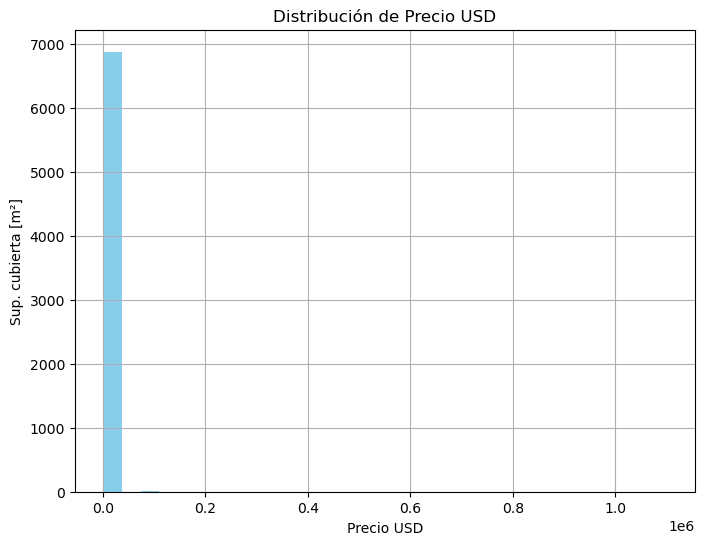

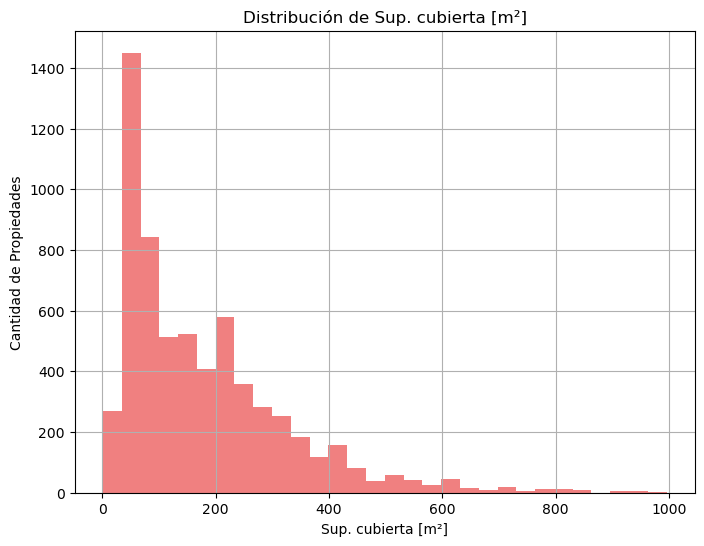

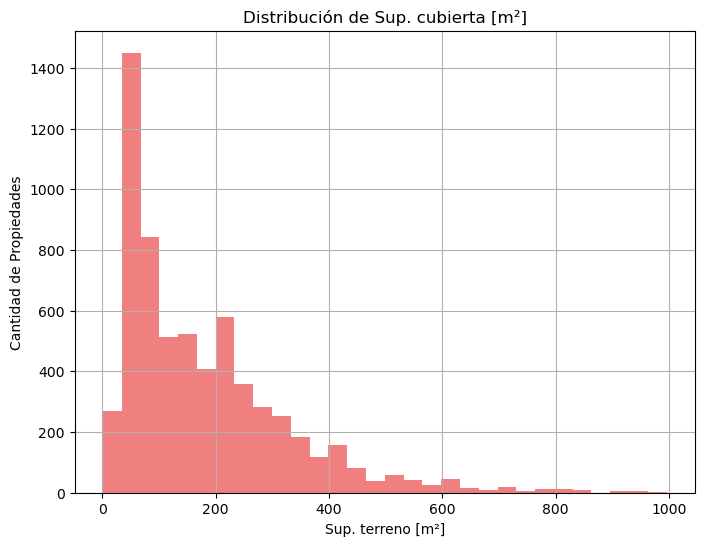

In [148]:

# Histograma de la variable 'Precio USD'
plt.figure(figsize=(8, 6))
df['Precio USD'].hist(bins=30, color='skyblue')
plt.title('Distribución de Precio USD')
plt.xlabel('Precio USD')
plt.ylabel('Sup. cubierta [m²]')
plt.show()

# Histograma de la variable 'Sup. cubierta [m²]'
plt.figure(figsize=(8, 6))
df['Sup. cubierta [m²]'].hist(bins=30, color='lightcoral')
plt.title('Distribución de Sup. cubierta [m²]')
plt.xlabel('Sup. cubierta [m²]')
plt.ylabel('Cantidad de Propiedades')
plt.show()


# Histograma de la variable 'Sup. cubierta [m²]'
plt.figure(figsize=(8, 6))
df['Sup. cubierta [m²]'].hist(bins=30, color='lightcoral')
plt.title('Distribución de Sup. cubierta [m²]')
plt.xlabel('Sup. terreno [m²]')
plt.ylabel('Cantidad de Propiedades')
plt.show()

Las columnas Sup. cubierta [m²] y Sup. terreno [m²] tienen la misma distribución, por lo que utilizaremos solo una. 

In [150]:

# Contar los valores nulos en el DataFrame
null_counts = df.isna().sum()

# Mostrar el recuento de valores nulos para cada columna
print(null_counts)


URL                      0
Ubicación                0
Precio ARS            6129
Precio USD               0
Expensas              4387
Sup. cubierta [m²]     569
Dormitorios            587
Baños                    0
Ambientes              465
Cocheras              2756
Sup. terreno [m²]     4505
Antiguedad [años]      771
Estado                   0
dtype: int64


In [153]:
# Contar valores nulos por columna
null_counts = df.isnull().sum()

# Mostrar columnas con valores nulos
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)


Precio ARS            6129
Expensas              4387
Sup. cubierta [m²]     569
Dormitorios            587
Ambientes              465
Cocheras              2756
Sup. terreno [m²]     4505
Antiguedad [años]      771
dtype: int64


In [159]:
# Crear una copia de df
df_clean = df.copy()

# Excluir las columnas especificadas
columns_to_exclude = ['Precio ARS', 'Expensas', 'Cocheras','Estado', 'Sup. terreno [m²]', 'Antiguedad [años]', 'URL', 'Ubicación']
df_clean = df_clean.drop(columns=columns_to_exclude)

# Completar los valores nulos con la mediana de cada columna
median_values = df_clean.median(numeric_only=True)
df_clean = df_clean.fillna(median_values)



In [160]:
df_clean


,Precio USD,Sup. cubierta [m²],Dormitorios,Baños,Ambientes
0,1400,160.0,3.0,2.0,4.0
1,1000,140.0,2.0,2.0,3.0
2,1100,76.0,2.0,2.0,3.0
3,250,35.0,3.0,1.0,0.0
4,4000,330.0,4.0,2.0,6.0
...,...,...,...,...,...
7714,590,150.0,3.0,3.0,4.0
7719,1200,140.0,3.0,3.0,4.0
7727,254,90.0,3.0,2.0,4.0
7729,236,250.0,3.0,2.0,8.0


In [166]:
# Calcular la matriz de correlación
correlation_matrix = df_clean.corr()
print(correlation_matrix)


                    Precio USD  Sup. cubierta [m²]  Dormitorios     Baños  \
Precio USD            1.000000            0.092552     0.068021  0.056929   
Sup. cubierta [m²]    0.092552            1.000000     0.651579  0.684241   
Dormitorios           0.068021            0.651579     1.000000  0.684863   
Baños                 0.056929            0.684241     0.684863  1.000000   
Ambientes             0.059228            0.626559     0.705178  0.646393   

                    Ambientes  
Precio USD           0.059228  
Sup. cubierta [m²]   0.626559  
Dormitorios          0.705178  
Baños                0.646393  
Ambientes            1.000000  


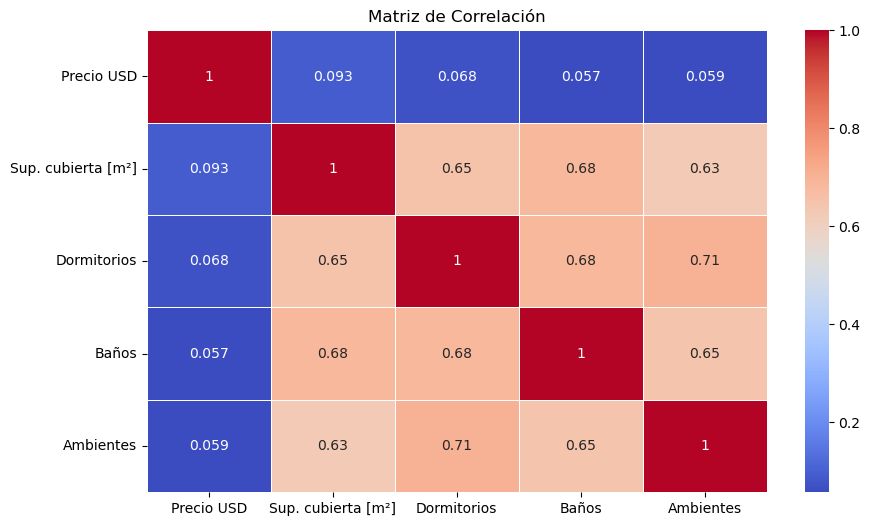

In [165]:
correlation_matrix = df_clean.corr()

# Crear un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()


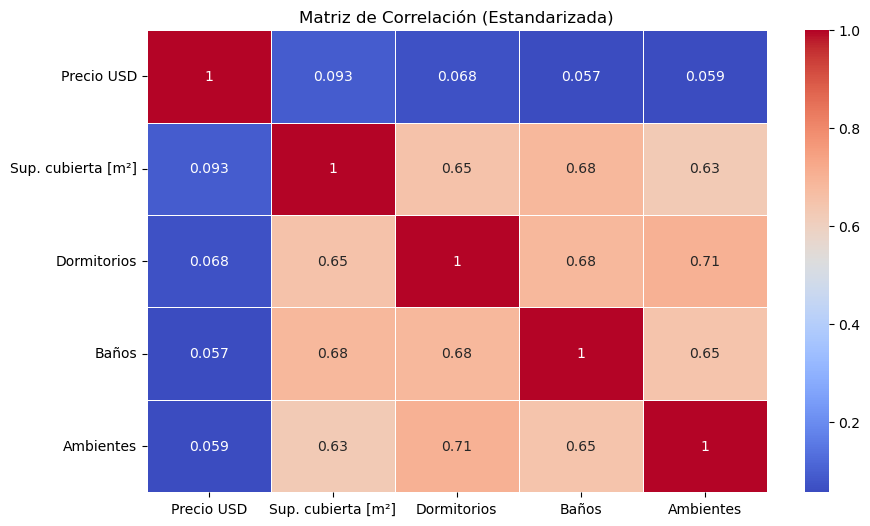

In [168]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las variables numéricas
numeric_columns = ['Precio USD', 'Sup. cubierta [m²]', 'Dormitorios', 'Baños', 'Ambientes']

# Crear una copia del DataFrame solo con las columnas numéricas
df_numeric = df_clean[numeric_columns].copy()

# Estándarizar las variables utilizando Z-score
scaler = StandardScaler()
df_numeric_standardized = scaler.fit_transform(df_numeric)

# Convertir el array estandarizado de nuevo a un DataFrame
df_standardized = pd.DataFrame(df_numeric_standardized, columns=numeric_columns)

# Calcular la matriz de correlación de Pearson
correlation_matrix = df_standardized.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación (Estandarizada)')
plt.show()


C:\Users\angel\AppData\Local\Temp\ipykernel_36520\1902958893.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['Precio USD'] = df_clean['Precio USD']


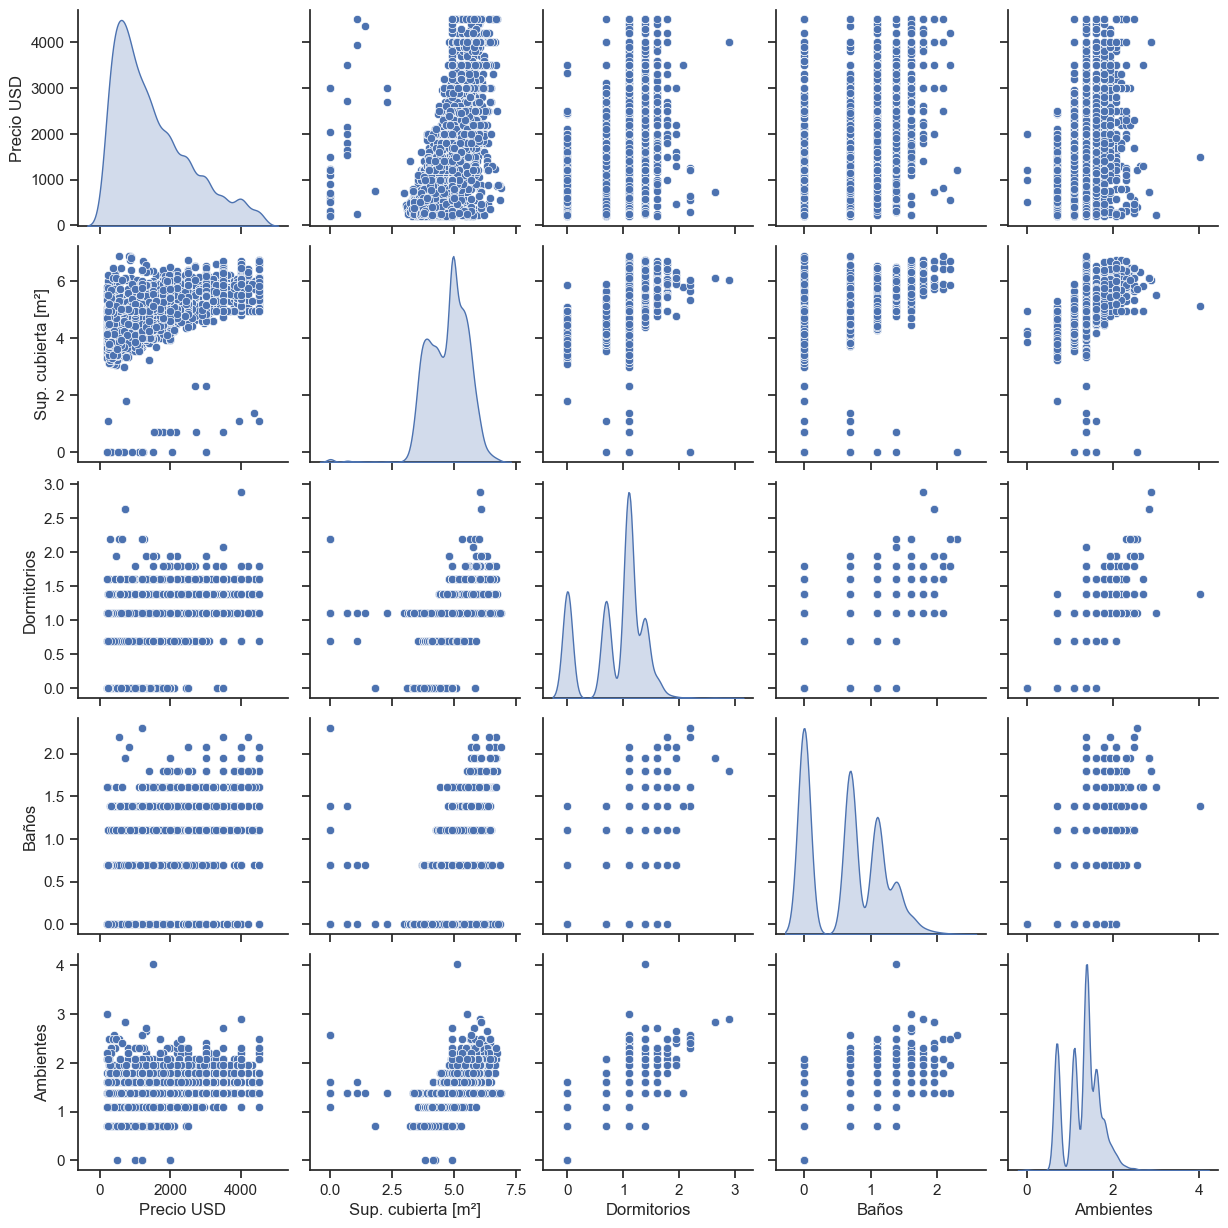

In [183]:

# Selecciona las variables numéricas que deseas incluir en el pairplot
numeric_columns = ['Precio USD', 'Sup. cubierta [m²]', 'Dormitorios', 'Baños', 'Ambientes']

# Crea un DataFrame con solo las columnas numéricas
df_numeric = df_clean[numeric_columns]

# Agrega la variable 'Precio USD' para observarla en el pairplot
df_numeric['Precio USD'] = df_clean['Precio USD']

# Crea un pairplot
sns.set(style="ticks")
sns.pairplot(df_numeric, kind="scatter", diag_kind="kde")

# Visualiza el pairplot
plt.show()


Tratamos los valores atipicos para mejorar la calidad de las correlaciones y el rendimiento del modelo

In [184]:
# Calcular el rango intercuartil (IQR) de la variable 'Precio USD'
Q1 = df_clean['Precio USD'].quantile(0.25)
Q3 = df_clean['Precio USD'].quantile(0.75)
IQR = Q3 - Q1

# Establecer un umbral para los valores atípicos
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar observaciones con valores atípicos
df_clean = df_clean[(df_clean['Precio USD'] >= lower_limit) & (df_clean['Precio USD'] <= upper_limit)]


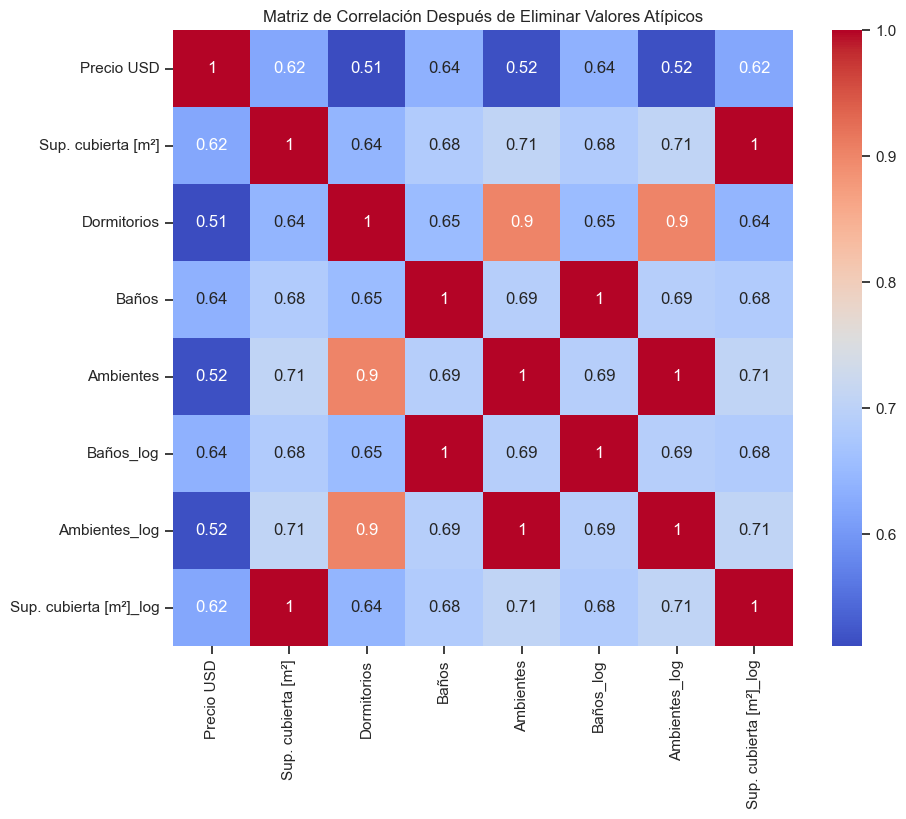

In [185]:


# Cálculo de la matriz de correlación después de eliminar los valores atípicos
correlation_matrix_cleaned = df_clean.corr(numeric_only=True)

# Crear una figura y un eje para mostrar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación Después de Eliminar Valores Atípicos')
plt.show()


In [191]:
# Crear un nuevo DataFrame con las variables transformadas
df_log_transformed = df_clean[['Precio USD', 'Sup. cubierta [m²]', 'Dormitorios', 'Baños', 'Ambientes']].apply(np.log1p)

# Renombrar las columnas para indicar que están en escala logarítmica
df_log_transformed.columns = [col + '_log' for col in df_log_transformed.columns]

# Verificar el nuevo DataFrame
print(df_log_transformed.head())


   Precio USD_log  Sup. cubierta [m²]_log  Dormitorios_log  Baños_log  \
0        7.244942                1.804211         0.741276   0.526589   
1        6.908755                1.781986         0.526589   0.526589   
2        7.003974                1.673489         0.526589   0.526589   
3        5.525453                1.516302         0.741276   0.000000   
4        8.294300                1.916789         0.869742   0.526589   

   Ambientes_log  
0       0.869742  
1       0.741276  
2       0.741276  
3            NaN  
4       1.026672  


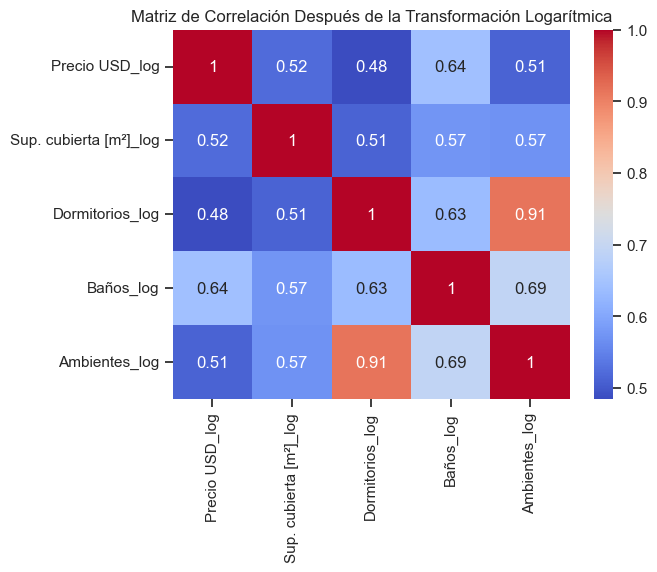

In [192]:
# Calcular la matriz de correlación
correlation_matrix_log = df_log_transformed.corr()

# Visualizar la matriz de correlación
sns.heatmap(correlation_matrix_log, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación Después de la Transformación Logarítmica')
plt.show()


In [194]:

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1', 'variable_2', 'r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return corr_mat

corr_matrix = df_log_transformed.select_dtypes(include=['float64', 'int']).corr(method='pearson')
correlation_df = tidy_corr_matrix(corr_matrix)
top_correlations = correlation_df.head(10)

print(top_correlations)


                variable_1              variable_2         r     abs_r
14         Dormitorios_log           Ambientes_log  0.914494  0.914494
22           Ambientes_log         Dormitorios_log  0.914494  0.914494
23           Ambientes_log               Baños_log  0.692915  0.692915
19               Baños_log           Ambientes_log  0.692915  0.692915
3           Precio USD_log               Baños_log  0.643454  0.643454
15               Baños_log          Precio USD_log  0.643454  0.643454
17               Baños_log         Dormitorios_log  0.633808  0.633808
13         Dormitorios_log               Baños_log  0.633808  0.633808
8   Sup. cubierta [m²]_log               Baños_log  0.573333  0.573333
16               Baños_log  Sup. cubierta [m²]_log  0.573333  0.573333


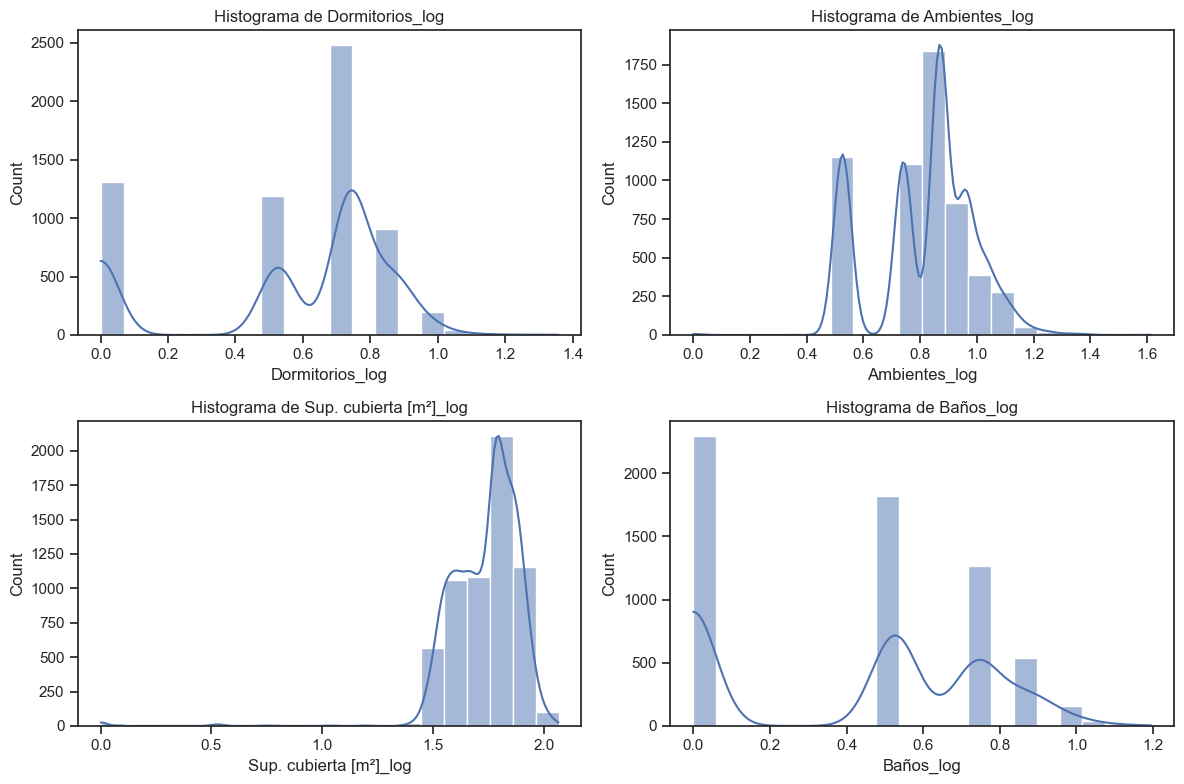

In [197]:
variables = ['Dormitorios_log', 'Ambientes_log', 'Sup. cubierta [m²]_log', 'Baños_log']

# Crear histogramas para las variables logarítmicas
plt.figure(figsize=(12, 8))
for i, var in enumerate(variables):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_log_transformed[var], kde=True, bins=20)
    plt.title(f'Histograma de {var}')

plt.tight_layout()
plt.show()


#Ajustamos el modelo

In [198]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# División de los datos en train y test
X = df_log_transformed[['Sup. cubierta [m²]_log', 'Ambientes_log']]
y = df_log_transformed['Precio USD_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234, shuffle=True)

# Agrega una constante a las variables independientes para estimar el intercepto
X_train = sm.add_constant(X_train, prepend=True)

# Crea y ajusta el modelo de regresión
model = sm.OLS(endog=y_train, exog=X_train)
model = model.fit()

# Imprime el resumen del modelo
print(model.summary())


MissingDataError: exog contains inf or nans

In [199]:
print(X_train.isinf().sum())
print(X_train.isna().sum())


AttributeError: 'DataFrame' object has no attribute 'isinf'

In [200]:
print(X_train.isin([np.nan, np.inf, -np.inf]).sum())


const                       0
Sup. cubierta [m²]_log      0
Ambientes_log             335
dtype: int64


Vemos que el modelo no funciona porque hay una variable [Ambientes_log] que tiene en su interior valores infinitos, trabajamos esos valores y volvemos ajustar. 

In [201]:
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(X_train.median())


In [202]:
print(X_train.isin([np.nan, np.inf, -np.inf]).sum())

const                     0
Sup. cubierta [m²]_log    0
Ambientes_log             0
dtype: int64


In [205]:
# Verificar valores infinitos o NaNs en las variables independientes
import numpy as np

inf_nan_columns = X_train.columns[X_train.isin([np.inf, -np.inf, np.nan]).any()]
print(inf_nan_columns)


Index(['Ambientes_log'], dtype='object')


In [206]:
median_ambientes_log = X_train['Ambientes_log'].median()
X_train['Ambientes_log'].fillna(median_ambientes_log, inplace=True)


In [207]:
# Verificar si hay valores infinitos o NaN en el DataFrame
if X_train.isin([np.nan, np.inf, -np.inf]).values.any():
    print("El DataFrame contiene valores NaN o infinitos.")
else:
    print("El DataFrame no contiene valores NaN o infinitos.")


El DataFrame no contiene valores NaN o infinitos.


In [210]:

# Asegurar de que X_train contiene una columna de unos para el intercepto
X_train = sm.add_constant(X_train, prepend=True)

# Crear y ajusta el modelo de regresión
model = sm.OLS(endog=y_train, exog=X_train)
results = model.fit()

# Mostrar los resultados
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:         Precio USD_log   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     1211.
Date:                Sat, 28 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:09:44   Log-Likelihood:                -4713.3
No. Observations:                4902   AIC:                             9433.
Df Residuals:                    4899   BIC:                             9452.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

#interpretacion:
R-squared: El coeficiente de determinación (R-cuadrado) es 0.331, lo que significa que el modelo explica el 33.1% de la variabilidad en la variable dependiente (Precio USD_log). En otras palabras, alrededor del 33.1% de la variabilidad en los precios en dólares se puede explicar utilizando las variables independientes (Sup. cubierta [m²]_log y Ambientes_log) en el modelo.
Coeficientes de Regresión: Los coeficientes para las variables independientes son los siguientes:

El coeficiente de la constante (intercepto) es 2.8455. Representa el valor estimado de Precio USD_log cuando todas las variables independientes son iguales a cero.
El coeficiente para Sup. cubierta [m²]_log es 1.8591. Esto significa que, manteniendo constante Ambientes_log, un aumento de una unidad en Sup. cubierta [m²]_log está asociado con un aumento de 1.8591 unidades en Precio USD_log.
El coeficiente para Ambientes_log es 1.1459. Esto significa que, manteniendo constante Sup. cubierta [m²]_log, un aumento de una unidad en Ambientes_log está asociado con un aumento de 1.1459 unidades en Precio USD_log.
Estadísticas de prueba:

El valor de probabilidad (P>|t|) para cada coeficiente es 0.000, lo que indica que todas las variables independientes son estadísticamente significativas en la predicción de Precio USD_log. En otras palabras, rechazamos la hipótesis nula de que los coeficientes son iguales a cero.
Bondad de ajuste:

El valor del estadístico Omnibus es 339.773, y su valor p es 0.000. Esto sugiere que el modelo no se ajusta adecuadamente a la normalidad (una distribución normal), lo que podría indicar una desviación de la normalidad en los errores del modelo.
El estadístico Durbin-Watson tiene un valor de aproximadamente 2.020, lo que sugiere que hay una autocorrelación en los residuos.
El estadístico Jarque-Bera (JB) es 996.371, y su valor p es 4.37e-217. Esto sugiere una desviación de la normalidad en los errores, lo que se refuerza por el valor del estadístico Omnibus.

Condición del número (Cond. No.): El número de condición es 27.1, lo que sugiere que no hay multicolinealidad seria en el modelo. Un número de condición cercano a 1 indica multicolinealidad, pero en este caso, parece no ser un problema.